In [481]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings

#Upload from CSVs
meat_pop_path = "New Files/meat_totals.csv"
us_temps_path = "New Files/global_temps_country.csv"
global_temps_path = "New Files/global_temps.csv"
climate_path = "New Files/climdiv_state_year.csv"
new_temps_path = "New Files/new_global_temps.csv"

#Read data and results
meat_pop_df = pd.read_csv(meat_pop_path)
us_temps_df = pd.read_csv(us_temps_path)
global_temps_df = pd.read_csv(global_temps_path)
climate_df = pd.read_csv(climate_path)
new_global_temps_df = pd.read_csv(new_temps_path)

new_global_temps_df.head()

,Country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Afghanistan, Islamic Rep. of",-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,Albania,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,Algeria,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,American Samoa,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,"Andorra, Principality of",0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [482]:
#Remove Error Message "https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy"
pd.options.mode.copy_on_write = True 

In [483]:
# Look at Data types and modify if necessary
meat_pop_df.dtypes


Month                      int64
Day                        int64
Year                       int64
beef_commercial          float64
veal_commercial          float64
pork_commercial          float64
lamb_commercial          float64
total_red_commercial     float64
beef_federal             float64
veal_federal             float64
pork_federal             float64
lamb_federal             float64
total_red_federal        float64
broilers_federal         float64
chicken_federal          float64
turkey_federal           float64
total_poultry_federal    float64
total_meat_federal       float64
dtype: object

In [484]:
#Find total red meat overall and make new column
meat_pop_df["total_red_meat"] = meat_pop_df["total_red_commercial"]+meat_pop_df["total_red_federal"]

meat_pop_df.head()

,Month,Day,Year,beef_commercial,veal_commercial,pork_commercial,lamb_commercial,total_red_commercial,beef_federal,veal_federal,pork_federal,lamb_federal,total_red_federal,broilers_federal,chicken_federal,turkey_federal,total_poultry_federal,total_meat_federal,total_red_meat
0,2,1,2024,2168.5,3.6,2371.2,10.9,4554.2,2135.0,3.4,2361.4,9.8,4509.6,3734.3,44.4,423.9,4213.3,8722.9,9063.8
1,1,1,2024,2280.8,3.9,2472.7,10.6,4768.0,2246.1,3.8,2462.4,9.6,4721.9,4051.4,47.4,435.2,4547.6,9269.5,9489.9
2,12,1,2023,2189.9,3.9,2342.0,10.7,4546.4,2159.0,3.7,2332.4,9.5,4504.7,3616.2,41.5,393.0,4063.1,8567.8,9051.1
3,11,1,2023,2280.9,4.3,2388.2,11.2,4684.5,2247.3,4.1,2377.4,10.1,4638.9,3817.3,44.5,449.2,4324.0,8962.9,9323.4
4,10,1,2023,2340.9,4.2,2418.5,11.3,4774.8,2300.8,4.0,2406.2,9.8,4720.8,4177.3,51.0,500.5,4742.1,9462.9,9495.6


In [485]:
#Look for only 1977 and after because null values before that
meat_pop_1977_df = meat_pop_df.loc[meat_pop_df["Year"]>=1977]

#Pull only columns needed
meat_pop_1977_df = meat_pop_1977_df[["Month", "Year", "total_red_meat"]]

#Drop Null Values

meat_pop_1977_df = meat_pop_1977_df.dropna()

#Drop 2024 because not all months
meat_pop_1977_df = meat_pop_1977_df.loc[meat_pop_1977_df["Year"]<2024]

#Reduce Dataframe
meat_pop_1977_df.head()

,Month,Year,total_red_meat
2,12,2023,9051.1
3,11,2023,9323.4
4,10,2023,9495.6
5,9,2023,8651.6
6,8,2023,9298.2


In [486]:
#Group Meat Pop and find totals per year
meat_avgs_df = meat_pop_1977_df.groupby("Year")["total_red_meat"].sum()

#Make DataFrame
meat_avgs_df = pd.DataFrame(meat_avgs_df)

#Reset Index
meat_avgs_df = meat_avgs_df.reset_index()

meat_avgs_df.head()

,Year,total_red_meat
0,1977,75952.9
1,1978,74168.2
2,1979,72539.7
3,1980,75201.6
4,1981,75472.7


In [487]:
#Sort Climate numbers
climate_df = climate_df.loc[climate_df["year"]>=1977]

#Reduce to only columns needed
climate_df = climate_df[["year", "tempc"]]

climate_df

,year,tempc
82,1977,16.921296
83,1978,16.592593
84,1979,16.310185
85,1980,16.925926
86,1981,16.657407
...,...,...
5995,2015,6.754630
5996,2016,6.615741
5997,2017,6.222222
5998,2018,5.782407


In [488]:
#Drop duplicates
climate_df = climate_df.drop_duplicates(subset="year")

#Rename Columns
climate_df = climate_df.rename(columns={"year":"Year"})
#Check Value Counts
climate_df.value_counts()

Year  tempc    
1977  16.921296    1
2009  17.171296    1
2001  17.240741    1
2002  17.541667    1
2003  17.074074    1
2004  17.407407    1
2005  17.439815    1
2006  17.888889    1
2007  18.000000    1
2008  17.175926    1
2010  17.060185    1
1999  17.856481    1
2011  17.685185    1
2012  18.287037    1
2013  17.000000    1
2014  16.685185    1
2015  18.120370    1
2016  18.523148    1
2017  18.351852    1
2018  18.027778    1
2000  17.537037    1
1998  18.402778    1
1978  16.592593    1
1987  17.245370    1
1979  16.310185    1
1980  16.925926    1
1981  16.657407    1
1982  17.412037    1
1983  16.217593    1
1984  17.120370    1
1985  17.106481    1
1986  17.828704    1
1988  16.708333    1
1997  16.870370    1
1989  16.777778    1
1990  18.287037    1
1991  17.754630    1
1992  16.726852    1
1993  16.847222    1
1994  17.250000    1
1995  17.240741    1
1996  16.736111    1
2019  18.541667    1
Name: count, dtype: int64

In [489]:
#Merge Climate and Red Meat
climate_meat_df = pd.merge(climate_df, meat_avgs_df, how = "inner", on="Year")

climate_meat_df

,Year,tempc,total_red_meat
0,1977,16.921296,75952.9
1,1978,16.592593,74168.2
2,1979,16.310185,72539.7
3,1980,16.925926,75201.6
4,1981,16.657407,75472.7
5,1982,17.412037,72944.8
6,1983,16.217593,76406.2
7,1984,17.120370,76546.2
8,1985,17.106481,76933.2
9,1986,17.828704,76900.3


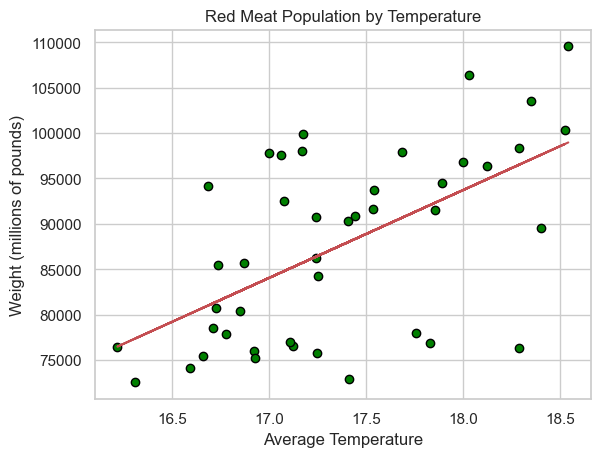

In [490]:
#Scatter plot of temp by meat
x = climate_meat_df["tempc"]
y = climate_meat_df["total_red_meat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
plt.xlabel("Average Temperature")
plt.ylabel("Weight (millions of pounds)")
plt.title("Red Meat Population by Temperature")
plt.scatter(x,y, marker="o", facecolors="green", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq,(1980, 7500),fontsize=15,color="red")

plt.show()

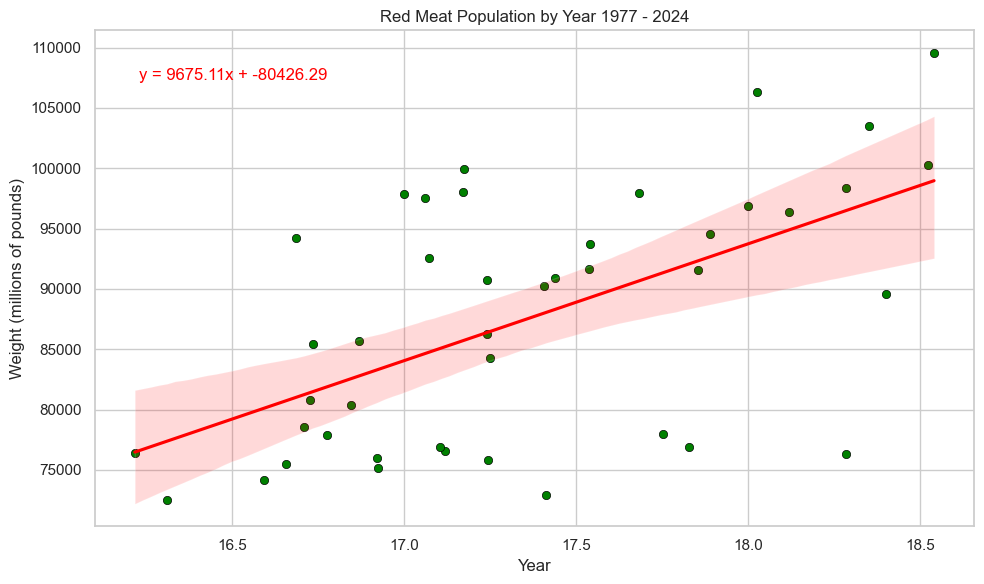

In [491]:
# production of red meat using seaborn

# Scatter plot with regression line 
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=climate_meat_df, x="tempc", y="total_red_meat", color="green", edgecolor="black")
sns.regplot(data=climate_meat_df, x="tempc", y="total_red_meat", scatter=False, color="red")

# Adding regression equation
x = climate_meat_df["tempc"]
y = climate_meat_df["total_red_meat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='red')

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Weight (millions of pounds)")
plt.title("Red Meat Population by Year 1977 - 2024")

# Save the plot
# plt.savefig("red_meat_population_regression.png")

plt.tight_layout()
plt.show()


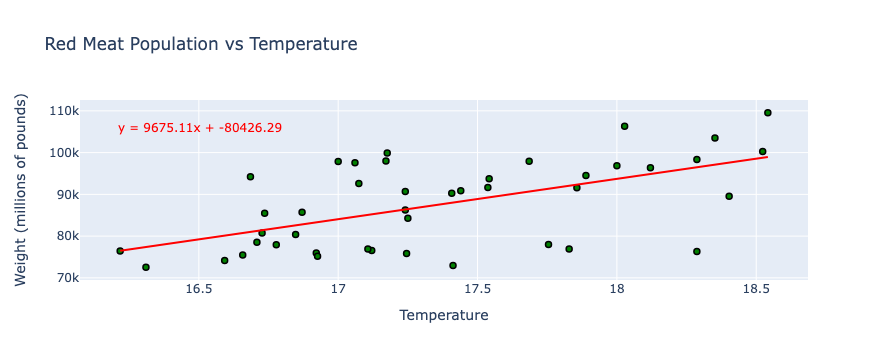

In [492]:
# production of red meat using plotly

# Scatter plot with regression line using Plotly Express
fig = px.scatter(climate_meat_df, x="tempc", y="total_red_meat", trendline="ols", 
                 trendline_color_override="red", labels={"tempc": "Temperature", "total_red_meat": "Weight (millions of pounds)"},
                 title="Red Meat Population vs Temperature")
fig.update_traces(marker=dict(color='green', line=dict(color='black', width=1.5)))

# Display equation of the regression line
fig.add_annotation(
    x=0.05,
    y=0.9,
    xref="paper",
    yref="paper",
    text=f"y = {slope:.2f}x + {intercept:.2f}",
    showarrow=False,
    font=dict(color="red", size=12)
)

# Show the plot
fig.show()

# Save the plot as an image
# fig.write_image("red_meat_population_regression_plotly.png")

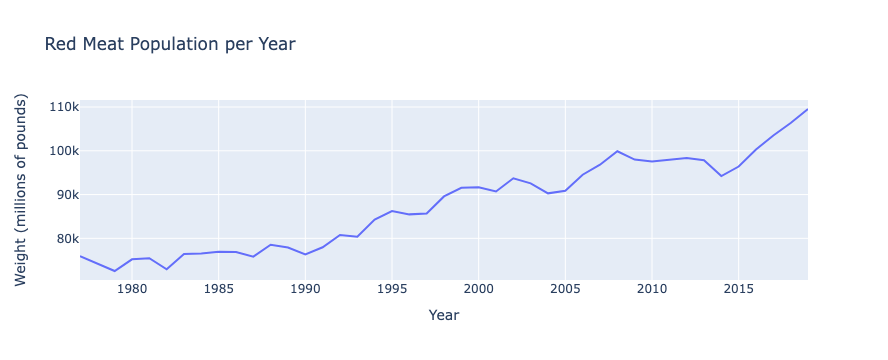

In [493]:
# Land average temp for June, july August using plotly 

# Concatenate the data frames and add a "Month" column
#climate_meat_df["Year"] = "Year"
#concatenated_df = pd.concat([june_df, july_df, august_df], ignore_index=True)

# Create the interactive plot using Plotly
fig = px.line(climate_meat_df, x="Year", y="total_red_meat",
              title="Red Meat Population per Year")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Weight (millions of pounds)")

# Save the plot as an image file
# fig.write_image("monthly_land_average_temperature_plotly.png")

fig.show()

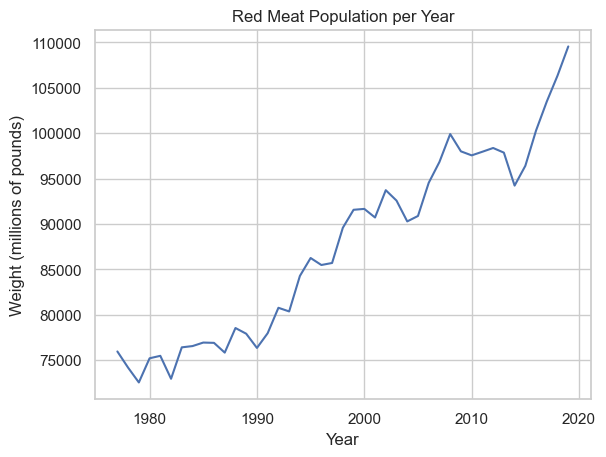

In [494]:
#Line Graph Meat by Year

x = climate_meat_df["Year"]
y = climate_meat_df["total_red_meat"]

fig, ax = plt.subplots()
ax.plot(x, y)
plt.title("Red Meat Population per Year")
plt.xlabel("Year")
plt.ylabel("Weight (millions of pounds)")
plt.show()

In [495]:
#Clean Global Temps
#Drop duplicates
global_temps_df = global_temps_df[["Month" ,"Year", "LandAverageTemperature"]]
global_temps_df = global_temps_df.sort_values(by='Year', ascending=True)
global_temps_df = global_temps_df.drop_duplicates(subset=["Year", "Month"])

global_temps_df

,Month,Year,LandAverageTemperature
360,1,1930,2.401
371,12,1930,3.831
370,11,1930,6.574
369,10,1930,9.261
368,9,1930,11.874
...,...,...,...
350,3,2029,5.099
349,2,2029,2.172
348,1,2029,2.054
353,6,2029,12.928


In [496]:
#Pull values by month
jan_df = global_temps_df.loc[global_temps_df["Month"]==1]

feb_df = global_temps_df.loc[global_temps_df["Month"]==2]

mar_df = global_temps_df.loc[global_temps_df["Month"]==3]

apr_df = global_temps_df.loc[global_temps_df["Month"]==4]

may_df = global_temps_df.loc[global_temps_df["Month"]==5]

june_df = us_temps_df.loc[us_temps_df["month"]==6]

july_df = us_temps_df.loc[us_temps_df["month"]==7]

aug_df = us_temps_df.loc[us_temps_df["month"]==8]

sep_df = global_temps_df.loc[global_temps_df["Month"]==9]

oct_df = global_temps_df.loc[global_temps_df["Month"]==10]

nov_df = global_temps_df.loc[global_temps_df["Month"]==11]

dec_df = global_temps_df.loc[global_temps_df["Month"]==12]

# aug_df = aug_df.drop_duplicates(subset=["year", "month"])

# june_df = june_df.drop_duplicates(subset=["year", "month"])

# july_df = july_df.drop_duplicates(subset=["year", "month"])

# aug_df = aug_df.sort_values(by="Year", ascending=True)

# june_df = june_df.sort_values(by="Year", ascending=True)

# july_df = july_df.sort_values(by="Year", ascending=True)

#july = june_df.loc[june_df["year"]>=1940]

july_df.tail(30)

,month,day,year,AverageTemperature,AverageTemperatureUncertainty,Country
1014,7,1,1990,21.605,0.175,United States
1026,7,1,1991,21.616,0.188,United States
1038,7,1,1992,20.595,0.212,United States
1050,7,1,1993,21.254,0.166,United States
1062,7,1,1994,21.694,0.206,United States
1074,7,1,1995,21.632,0.147,United States
1086,7,1,1996,21.636,0.183,United States
1098,7,1,1997,21.597,0.246,United States
1110,7,1,1998,22.626,0.141,United States
1130,7,1,2011,22.722,0.220,United States


In [497]:
#POULTRY Look for only 1977 and after because null values before that
poul_pop_1977_df = meat_pop_df.loc[meat_pop_df["Year"]>=1977]

#Pull only columns needed


poul_pop_1977_df = poul_pop_1977_df[["Year", "total_poultry_federal"]]

poul_pop_1977_df

,Year,total_poultry_federal
0,2024,4213.3
1,2024,4547.6
2,2023,4063.1
3,2023,4324.0
4,2023,4742.1
...,...,...
562,1977,969.7
563,1977,877.1
564,1977,918.9
565,1977,763.9


In [498]:
#Poultry Totals
poul_totals_df = poul_pop_1977_df.groupby("Year")["total_poultry_federal"].sum()

poul_totals_df = pd.DataFrame(poul_totals_df)

poul_totals_df = poul_totals_df.reset_index()

poul_totals_df.head()

,Year,total_poultry_federal
0,1977,11696.6
1,1978,12447.4
2,1979,13733.1
3,1980,14232.9
4,1981,15058.3


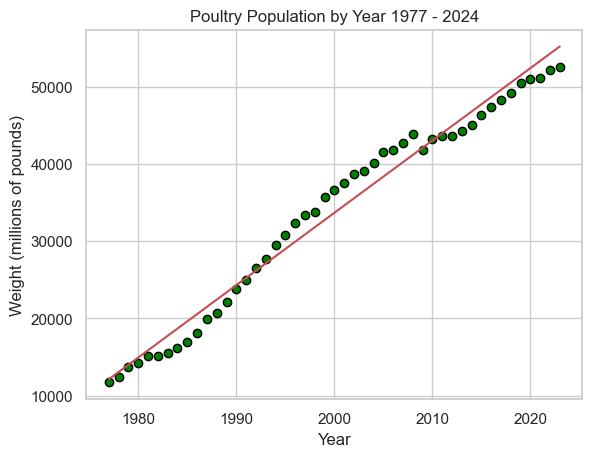

In [456]:
#Scatter plot
x = poul_totals_df.index
y = poul_totals_df["total_poultry_federal"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
plt.xlabel("Year")
plt.ylabel("Weight (millions of pounds)")
plt.title("Poultry Population by Year 1977 - 2024")
plt.scatter(x,y, marker="o", facecolors="green", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq,(2001, 3500),fontsize=15,color="red")

plt.show()


In [ ]:
#Poultry vs temps
poul_temps_short = poul_temps_df.loc[poul_temps_df["Month"]==6]

poul_temps_short = poul_temps_short[["Month", "Year", "AverageTemperature"]]

poul_temps_short 

#Merge temp and averages

poul_temps_df = pd.merge(average_1_df, poul_temps_short, how="inner", on="Year")

poul_temps_df

In [500]:
#Merge poultry totals and climate
poul_temps_df = pd.merge(poul_totals_df, climate_df, how="inner", on="Year")

poul_temps_df.head()

,Year,total_poultry_federal,tempc
0,1977,11696.6,16.921296
1,1978,12447.4,16.592593
2,1979,13733.1,16.310185
3,1980,14232.9,16.925926
4,1981,15058.3,16.657407


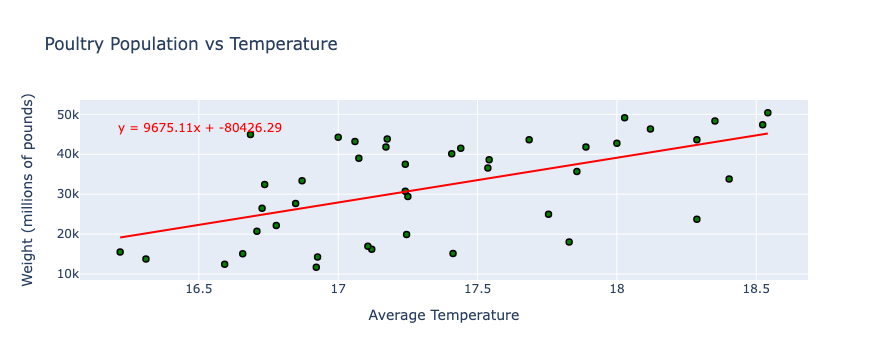

In [503]:
# production of red meat using plotly

# Scatter plot with regression line using Plotly Express
fig = px.scatter(poul_temps_df, x="tempc", y="total_poultry_federal", trendline="ols", 
                 trendline_color_override="red", labels={"tempc": "Average Temperature", "total_poultry_federal": "Weight (millions of pounds)"},
                 title="Poultry Population vs Temperature")
fig.update_traces(marker=dict(color='green', line=dict(color='black', width=1.5)))

# Display equation of the regression line
fig.add_annotation(
    x=0.05,
    y=0.9,
    xref="paper",
    yref="paper",
    text=f"y = {slope:.2f}x + {intercept:.2f}",
    showarrow=False,
    font=dict(color="red", size=12)
)

# Show the plot
fig.show()

# Save the plot as an image
# fig.write_image("red_meat_population_regression_plotly.png")

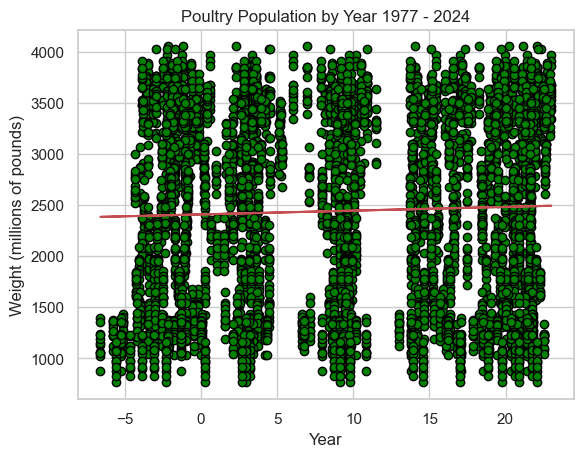

In [457]:
#Scatter plot
x = poul_temps_df["AverageTemperature"]
y = poul_temps_df["total_poultry_federal"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
plt.xlabel("Year")
plt.ylabel("Weight (millions of pounds)")
plt.title("Poultry Population by Year 1977 - 2024")
plt.scatter(x,y, marker="o", facecolors="green", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq,(1980, 7500),fontsize=15,color="red")

plt.show()

In [452]:
#Filter out 2024

poul_totals_df = poul_totals_df.loc[poul_totals_df["Year"]<2024]

poul_totals_df.tail()

,total_poultry_federal,Year
Year,,
2019,50395.1,2019
2020,50993.1,2020
2021,51121.4,2021
2022,52140.1,2022
2023,52579.7,2023


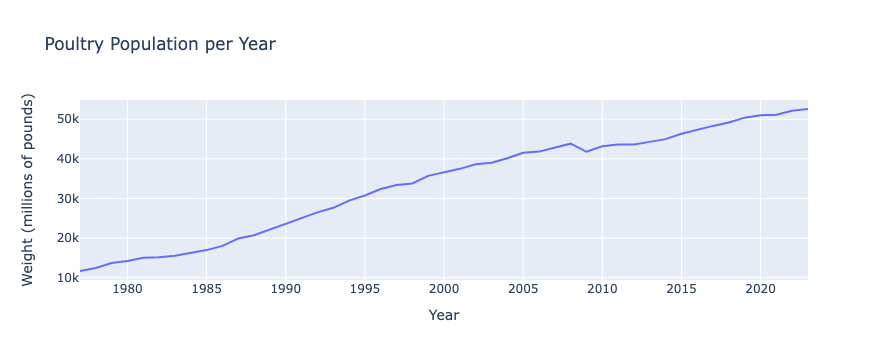

In [453]:
# Land average temp for June, july August using plotly 

# Concatenate the data frames and add a "Month" column
#climate_meat_df["Year"] = "Year"
#concatenated_df = pd.concat([june_df, july_df, august_df], ignore_index=True)

# Create the interactive plot using Plotly
fig = px.line(poul_totals_df, x="Year", y="total_poultry_federal",
              title="Poultry Population per Year")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Weight (millions of pounds)")

# Save the plot as an image file
# fig.write_image("monthly_land_average_temperature_plotly.png")

fig.show()

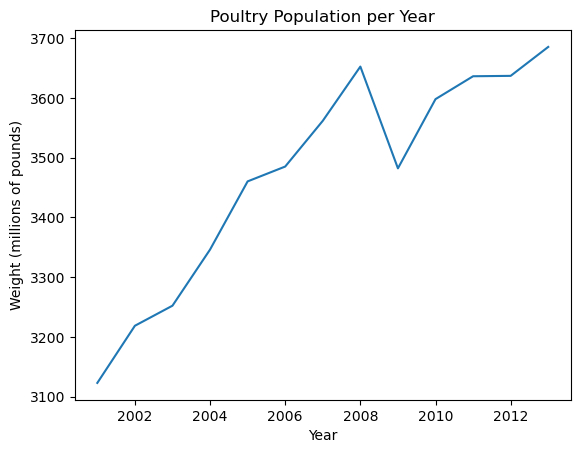

In [376]:
#Line plot
x = average_1_df.index
y = average_1_df["total_poultry_federal"]

fig, ax = plt.subplots()
ax.plot(x, y)
plt.title("Poultry Population per Year")
plt.xlabel("Year")
plt.ylabel("Weight (millions of pounds)")
plt.show()